In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [2]:
for col in ['view', 'waterfront', 'yr_renovated']:
        df[col] = df[col].fillna(0)

In [3]:
df["sqft_basement"] = df.apply(replace_null_basement(df), axis = 1)

In [4]:
for col in ['waterfront', 'view', 'yr_renovated']:
    df[col] = df[col].apply(lambda x: to_int(x))

In [5]:
df['posix_date'] = df['date'].apply(lambda x: to_posix(x))

In [6]:
df['date'] = pd.to_datetime(df['date'])

## Data Overview

In [7]:
df_corr = df.loc[:, "price":"posix_date"]
df_corr.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'posix_date'],
      dtype='object')

## Our Random Correlation Heatmap

In [8]:
map_corr = np.corrcoef(df_corr, rowvar=0)

In [9]:
map_corr = pd.DataFrame(map_corr,
                        columns=['Price', 'Bedrooms', 'Bathrooms', 'Living SqFt', 'Lot SqFt', 'Floors',
                                 'Waterfront', 'View', 'Condition', 'Grade', 'Above-Ground SqFt',
                                 'Basement SqFt', 'Year Built', 'Year Renovated', 'Zipcode', 'Lat', 'Long',
                                 'Neighbor Lv', 'Neighbor Lot', 'Date in Posix'],
                        index=['Price', 'Bedrooms', 'Bathrooms', 'Living SqFt', 'Lot SqFt', 'Floors',
                               'Waterfront', 'View', 'Condition', 'Grade', 'Above-Ground SqFt',
                               'Basement SqFt', 'Year Built', 'Year Renovated', 'Zipcode', 'Lat', 'Long',
                               'Neighbor Lv', 'Neighbor Lot', 'Posix Date'])

map_corr

,Price,Bedrooms,Bathrooms,Living SqFt,Lot SqFt,Floors,Waterfront,View,Condition,Grade,Above-Ground SqFt,Basement SqFt,Year Built,Year Renovated,Zipcode,Lat,Long,Neighbor Lv,Neighbor Lot,Date in Posix
Price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.323799,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.004002
Bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.302808,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.016523
Bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.283440,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.034237
Living SqFt,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.435130,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.034276
Lot SqFt,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.006337
Floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022334
Waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.082800,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.000363
View,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.273845,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,-0.001630
Condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.050883
Grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.168220,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981,-0.039773


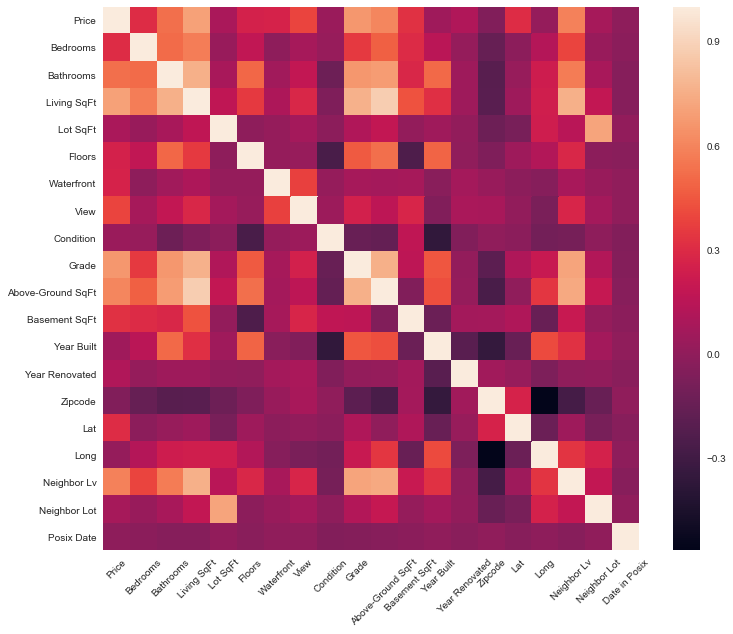

In [10]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(data = map_corr)
plt.xticks(rotation=45) 
plt.show()

#### Thoughts from Correlation Heat Map:
- Can probably remove sqft_above and sqft_basement since they're included in sqft_living

In [11]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,posix_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.413176e+09
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.418105e+09
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.424844e+09
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.418105e+09
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.424239e+09
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1.399871e+09
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1.403845e+09
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1.421302e+09
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1.429074e+09
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,1.426136e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
posix_date       21597 non-null float64
dtypes: datetime64[ns](1), float64

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c17b08e48>,
      dtype=object)

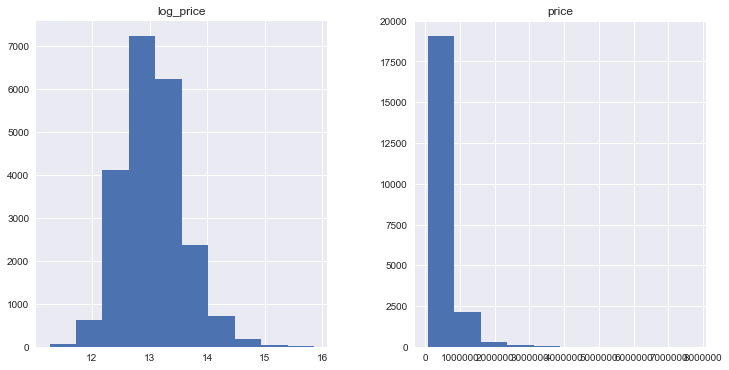

In [13]:
df["log_price"] = np.log(df["price"])
df[["price", "log_price"]].hist(figsize = [12,6])

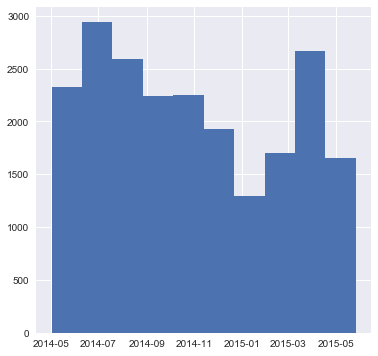

In [14]:
df["date"].hist(figsize = [6,6])

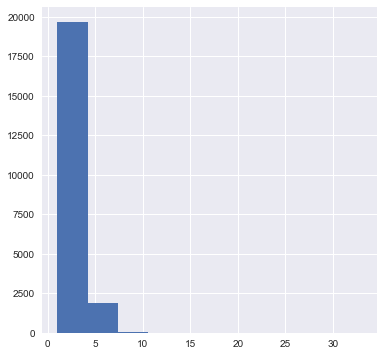

In [15]:
df["bedrooms"].hist(figsize = [6,6])

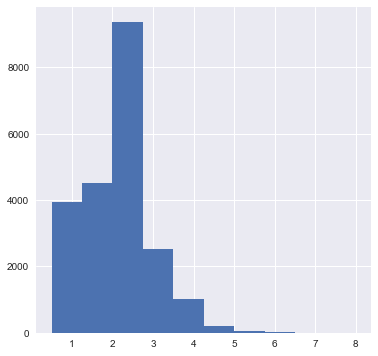

In [16]:
df["bathrooms"].hist(figsize = [6,6])

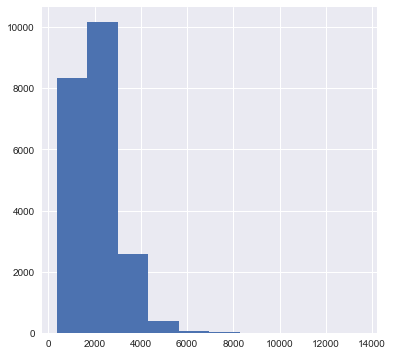

In [17]:
df["sqft_living"].hist(figsize = [6,6])

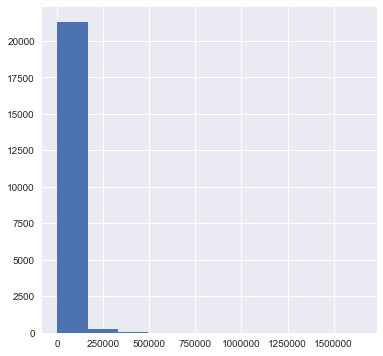

In [18]:
df["sqft_lot"].hist(figsize = [6,6])

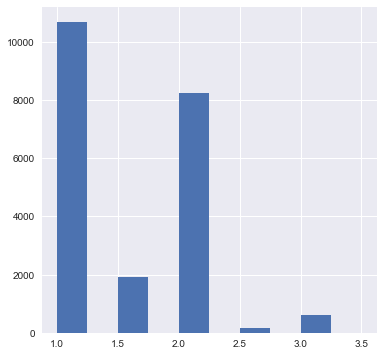

In [19]:
df["floors"].hist(figsize = [6,6])

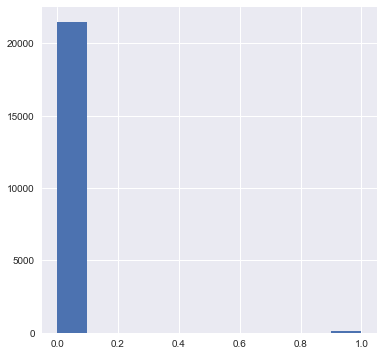

In [20]:
df["waterfront"].hist(figsize = [6,6])

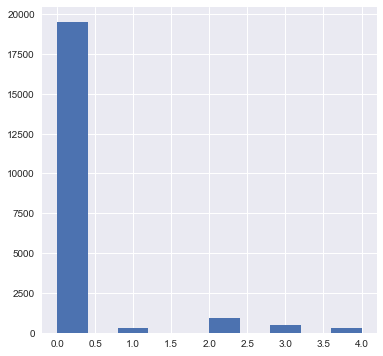

In [21]:
df["view"].hist(figsize = [6,6])

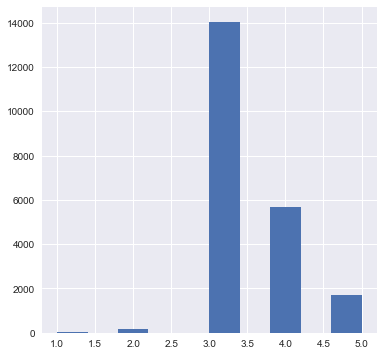

In [22]:
df["condition"].hist(figsize = [6,6])

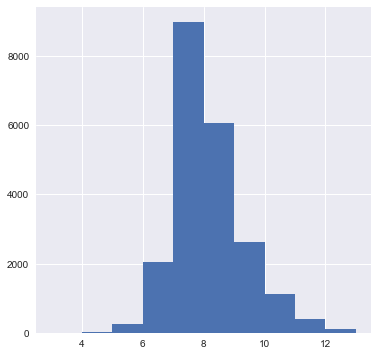

In [23]:
df["grade"].hist(figsize = [6,6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1879e710>,
      dtype=object)

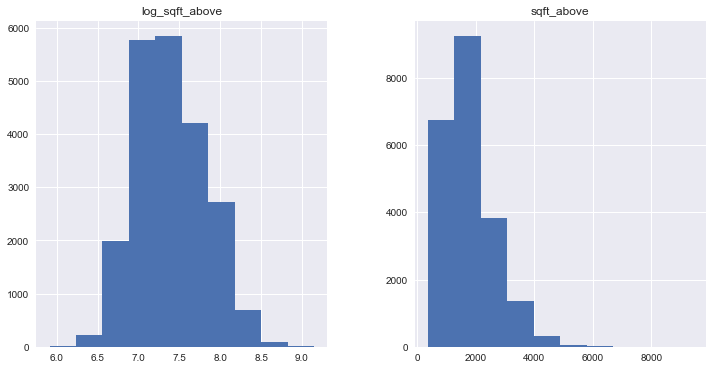

In [24]:
df["log_sqft_above"] = np.log(df["sqft_above"])
df[["sqft_above", "log_sqft_above"]].hist(figsize = [12,6])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a390c18>,
      dtype=object)

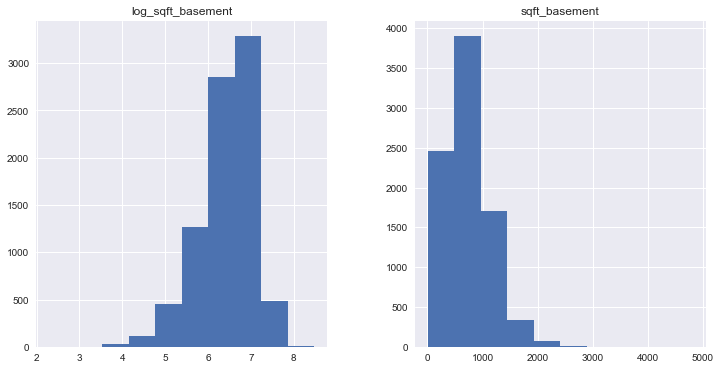

In [25]:
df_with_basement = df.loc[df['sqft_basement'] > 0]

df_with_basement["log_sqft_basement"] = np.log(df_with_basement["sqft_basement"])
df_with_basement[["sqft_basement", "log_sqft_basement"]].hist(figsize = [12,6])
# df["sqft_basement"].hist(figsize = [6,6])

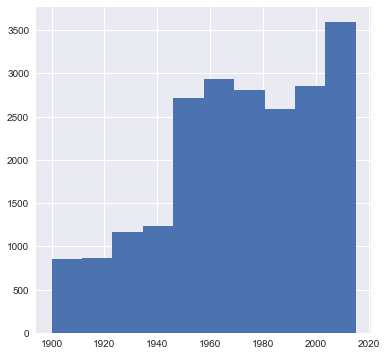

In [26]:
df["yr_built"].hist(figsize = [6,6])

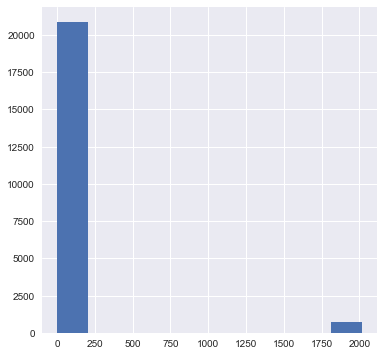

In [27]:
df["yr_renovated"].hist(figsize = [6,6])

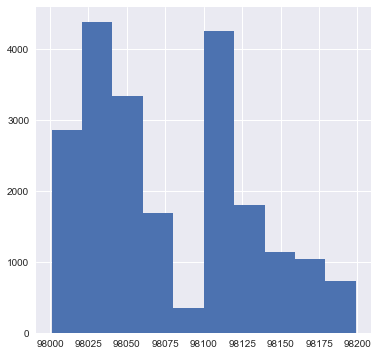

In [28]:
df["zipcode"].hist(figsize = [6,6])

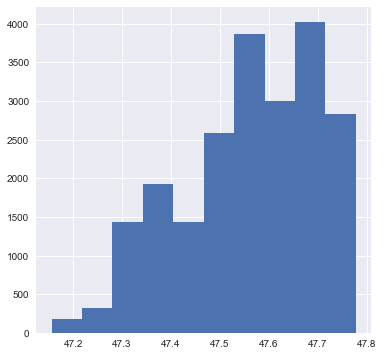

In [29]:
df["lat"].hist(figsize = [6,6])

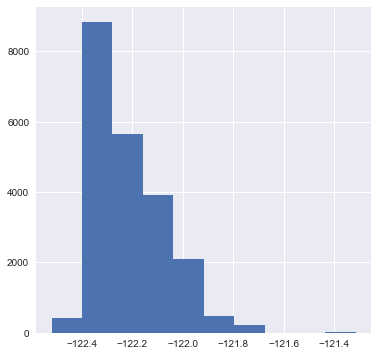

In [30]:
df["long"].hist(figsize = [6,6])

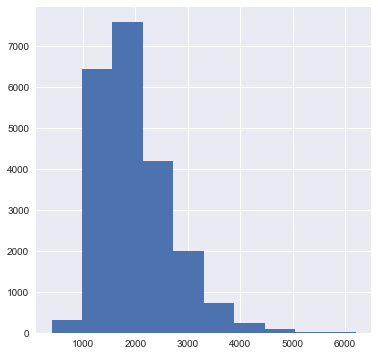

In [31]:
df["sqft_living15"].hist(figsize = [6,6])

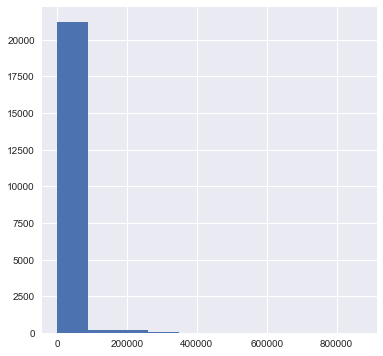

In [32]:
df["sqft_lot15"].hist(figsize = [6,6])